In [1]:
import f3dasm
import matplotlib.pyplot as plt
import os
import copy


from cycler import cycler
cc = (cycler(color=list('bgrcmyk')) *
      cycler(linestyle=['-', '--', 'dotted']))

2022-12-08 11:05:14.179017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 11:05:14.323590: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-08 11:05:15.076097: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:/usr/local/cuda-11.1/lib64
2022-12-08 11:05:15.076202: W ten

In [2]:
files = (os.listdir('./obj'))
files = [file[:-4] for file in files]

In [3]:
results = [f3dasm.read_pickle('./obj/'+files[i]) for i in range(len(files))]

In [4]:
def plot_results(results, ax):
    mean_y, _ = f3dasm.calculate_mean_std(results)
    ax.plot(mean_y, label=f"optimizer={results.optimizer}")
    return ax

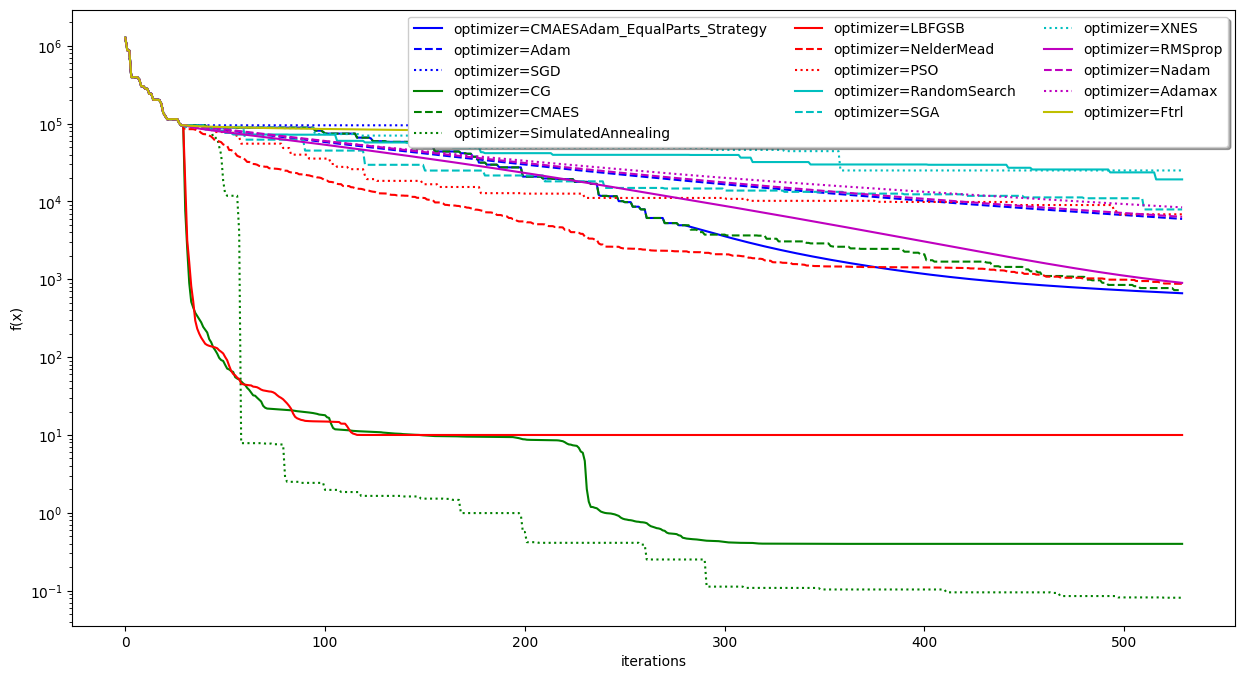

In [5]:
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('f(x)')
ax.set_yscale('log')
ax.set_prop_cycle(cc)

for index, res in enumerate(results[1]):
    ax = plot_results(res, ax)

leg = ax.legend(loc='upper right', ncol=3, fancybox=True, shadow=True) #bbox_to_anchor=(0.5, 1.05)

# fig.savefig(files[i]+'.png', dpi=300)

In [6]:
# def margin_of_victory(results: List[f3dasm.OptimizationResult]) -> pd.DataFrame:

#     # Create df with all results
#     df = pd.concat([f3dasm.calculate_mean_std(results[i])[0] for i,_ in enumerate(results)], axis=1)

#     # Change columnnames
#     optimizer_names = [results[i].optimizer for i,_ in enumerate(results)]
#     df.columns = optimizer_names

#     #Normalize
#     min_max_scaler = preprocessing.MinMaxScaler()

#     # Reshape to 1D array
#     df_numpy = df.values #returns a numpy array
#     df_numpy_reshaped = df_numpy.reshape(-1,1)

#     x_scaled = min_max_scaler.fit_transform(df_numpy_reshaped)

#     # Transform back
#     x_scaled = x_scaled.reshape(df_numpy.shape)
#     df = pd.DataFrame(x_scaled)
#     df.columns = optimizer_names

#     # Calculate margin of victory
#     mov = []
#     for name in optimizer_names:
#         df_dropped = df.drop(name, axis=1)
#         mov.append(df_dropped.min(axis=1) - df[name])

#     # Create df with all MoV
#     df_margin_of_victory = pd.concat(mov,axis=1)

#     # Change columnnames
#     df_margin_of_victory.columns = optimizer_names

#     return df_margin_of_victory

In [7]:
# Margin of victory for one problem
df_margin_of_victory_1 = f3dasm.margin_of_victory(results[0])

# Mean margin of victory
for index,r in enumerate(results):
    df_mov = f3dasm.margin_of_victory(r)
    if index == 0:
        res = copy.copy(df_mov)
        continue
    res = res + df_mov
    
res = res / len(results)

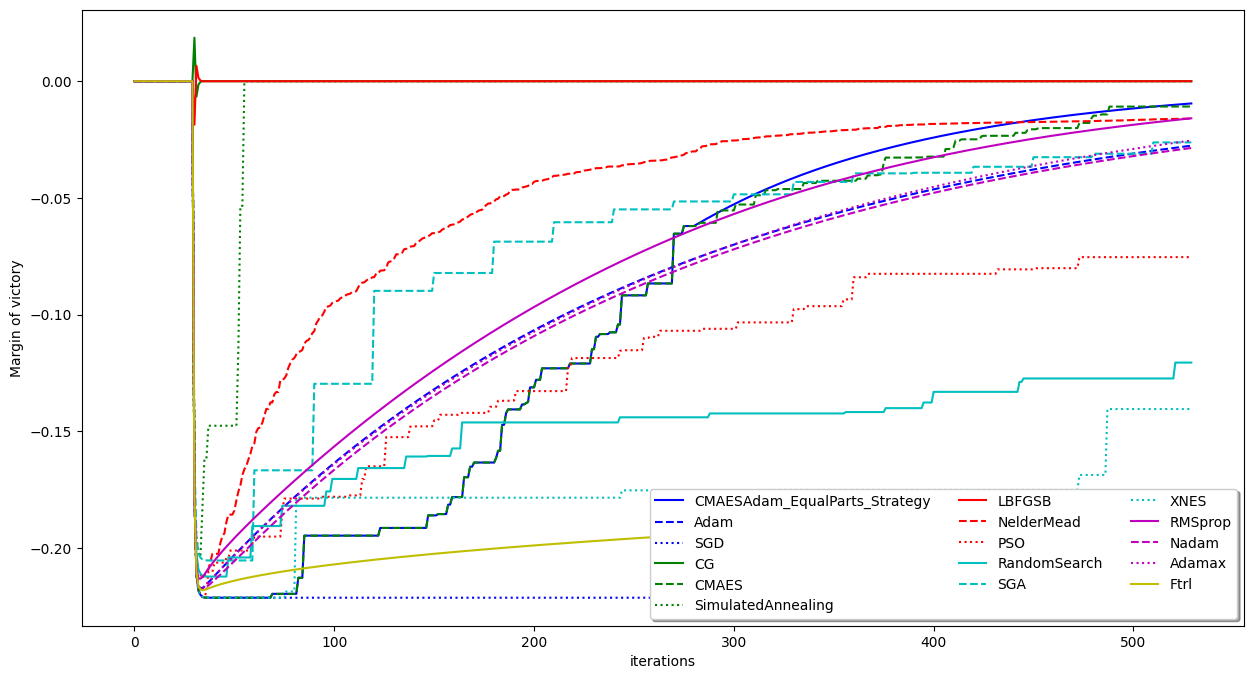

In [8]:
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('Margin of victory')
ax.set_prop_cycle(cc)

ax.plot(df_margin_of_victory_1, label=df_margin_of_victory_1.columns)

leg = ax.legend(loc='lower right', ncol=3, fancybox=True, shadow=True) #bbox_to_anchor=(0.5, 1.05)

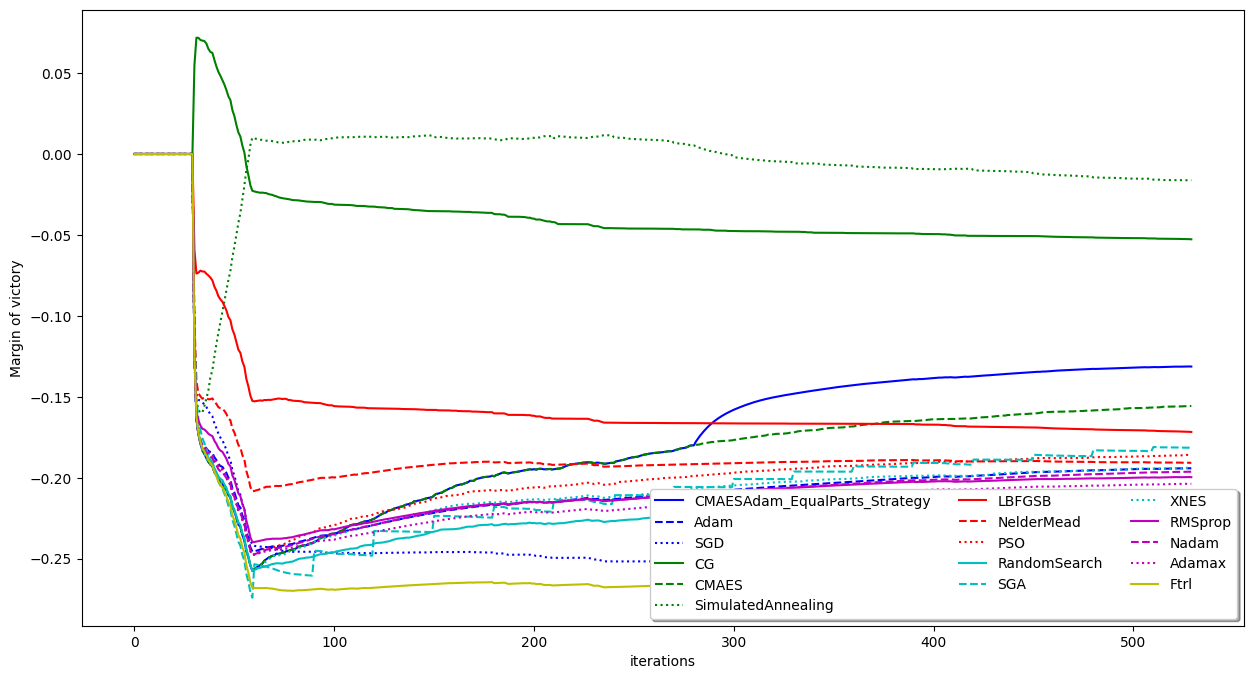

In [9]:
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('Margin of victory')
ax.set_prop_cycle(cc)

ax.plot(res, label=df_margin_of_victory_1.columns)

leg = ax.legend(loc='lower right', ncol=3, fancybox=True, shadow=True) #bbox_to_anchor=(0.5, 1.05)